In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import fkplotlib

fkplotlib.use_txfonts()
colors = list(fkplotlib.get_gruvbox_colors()['faded'].values())
np.random.seed(155)

# Data

In [2]:
truth = {"alpha": 0.0, "beta": 1.0}
data = {"x": np.random.uniform(-5, 5, 100), "y_err": 0.1 * np.ones(100)}
data["y"] = np.random.normal(truth["alpha"] + truth["beta"] * data["x"], data["y_err"])

In [3]:
def loglike(teta):
    model = teta[0] + teta[1] * data["x"]
    chi2_vec = ((data["y"] - model) / data["y_err"]) ** 2
    return -0.5 * np.sum(chi2_vec)

# Run MCMC

In [4]:
np.random.seed(155)
#init_pos = np.array([[-0.25, 1.25], [0.25, 1.25], [-0.25, 0.75], [0.25, 0.75]], dtype=float)
init_pos = np.array([[-0.1, 1.1], [0.1, 1.1], [-0.1, 0.9], [0.1, 0.9]], dtype=float)
sampler = emcee.EnsembleSampler(4, 2, loglike, moves=emcee.moves.WalkMove())
sampler.run_mcmc(
    init_pos, int(1000), progress=True, store=True, skip_initial_state_check=True
)
chains = sampler.chain
chains.shape

100%|██████████| 1000/1000 [00:01<00:00, 965.18it/s]


(4, 1000, 2)

# Walks in parameter space plot

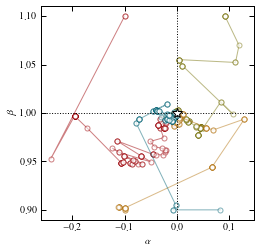

In [10]:
pad = 0.13
fig, ax = plt.subplots(figsize=(4, 4))
for i, chain in enumerate(chains[:, :100, :]):
    ax.plot(chain[:, 0], chain[:, 1], "o-", color=colors[i], mec=colors[i], mfc="w", ms=5, alpha=0.5)
ax.plot(truth["alpha"], truth["beta"], "k*", ms=10, mfc="w", mew=1, zorder=10)
ax.axvline(truth["alpha"], color="k", ls=":")
ax.axhline(truth["beta"], color="k", ls=":")
ax.set_yticks(np.arange(0.9, 1.15, 0.05))
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\beta$")
fkplotlib.ax_bothticks(ax)
fig.subplots_adjust(left=pad, right=1-pad, top=1-pad, bottom=pad)
fig.savefig("mcmc_params.pdf")

# Trace plot

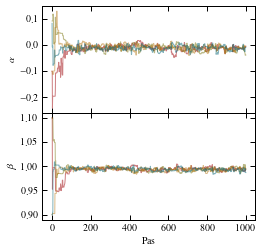

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4), sharex=True)
thin_by = 1
pts = np.arange(chains.shape[1] // thin_by)
for i, chain in enumerate(chains):
    for j in range(2):
        axs[j].plot(pts, chain[pts * thin_by, j], color=colors[i], alpha=0.5)
axs[0].set_ylabel(r"$\alpha$")
axs[1].set_ylabel(r"$\beta$")
axs[1].set_xlabel(r"Pas")
fig.subplots_adjust(left=pad, right=1-pad, top=1-pad, bottom=pad, hspace=0)
fkplotlib.ax_bothticks(axs[0])
fkplotlib.ax_bothticks(axs[1])
fig.align_labels(axs)
#axs[0].set_xscale('log')
#axs[1].set_xscale('log')
fig.savefig("mcmc_trace.pdf")